# Students Performance in Exams

In [1]:
#import all dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()

## 1. Collecting the data

In [2]:
perform = pd.read_csv('../Data/Students_Performance_In_Exams/StudentsPerformance.csv')
perform.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
perform.describe()

In [ ]:
perform.isnull().sum()

## 2. Defining the problem statement

Complete the analysis and build the model that will determine the gender of the student

## 3. Exploratory data analysis

In [4]:
def box_chart(feature):
    female = perform[perform['gender']==1][feature].value_counts()
    male = perform[perform['gender']==0][feature].value_counts()
    df = pd.DataFrame([male,female])
    df.index = ['male','female']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [5]:
def cross_tab_(feature):
    print(pd.crosstab(perform[feature],perform['gender']).apply(lambda x: x*100/x.sum(), axis=1))

In [3]:
perform['gender'] = perform['gender'].apply(lambda x: 1 if x == 'female' else 0)

In [7]:
perform.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44
4,0,group C,some college,standard,none,76,78,75


In [ ]:
box_chart('test preparation course')
cross_tab_('test preparation course')

In [ ]:
box_chart('parental level of education')
cross_tab = pd.crosstab(perform['parental level of education'],perform['gender']).apply(lambda x: x*100/x.sum(), axis=1)
print(cross_tab)

In [ ]:
box_chart('race/ethnicity')
cross_tab_('race/ethnicity')

In [ ]:
box_chart('lunch')
cross_tab_('lunch')

In [ ]:
perform['math score'].value_counts()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('math score', hue='gender', data=perform)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('math score', hue='gender', data=perform)
plt.xlim(30,45)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('math score', hue='gender', data=perform)
plt.xlim(45,55)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('math score', hue='gender', data=perform)
plt.xlim(55,65)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('math score', hue='gender', data=perform)
plt.xlim(65,75)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('math score', hue='gender', data=perform)
plt.xlim(75,85)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('reading score', hue='gender', data=perform)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('writing score', hue='gender', data=perform)

In [ ]:
sns.heatmap(perform.corr())

## 4. Feature Engineering

In [8]:
perform = pd.get_dummies(perform,columns = ["race/ethnicity","lunch","parental level of education",
                                      "test preparation course"])

In [9]:
perform.head()

,gender,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,1,72,72,74,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,69,90,88,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,1,90,95,93,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,47,57,44,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,0,76,78,75,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


### 4.1 parental level of education

In [ ]:
perform.head()

In [4]:
parent_ed_map = {'some college': 0.43, "associate's degree": 0.47, 'high school': 0.7,
                 'some high school': 0.5, "bachelor's degree": 0.46, "master's degree": 0.3}
perform['parental level of education'] = perform['parental level of education'].map(parent_ed_map)

In [5]:
perform.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,0.46,standard,none,72,72,74
1,1,group C,0.43,standard,completed,69,90,88
2,1,group B,0.30,standard,none,90,95,93
3,0,group A,0.47,free/reduced,none,47,57,44
4,0,group C,0.43,standard,none,76,78,75


### 4.2 lunch

In [6]:
perform['lunch'] = perform['lunch'].apply(lambda x: 0 if x == 'free/reduced' else 1)

In [ ]:
perform.head()

### 4.3 test preparation course

In [7]:
perform['test preparation course'] = perform['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)

In [ ]:
perform.head()

### 4.4 race/ethnicity

In [8]:
group_map = {'group A': 0.2, 'group B': 0.55, 'group C': 0.6, 'group D': 0.33, 'group E': 0.3}
perform['race/ethnicity'] = perform['race/ethnicity'].map(group_map)

In [ ]:
perform.head()

### 4.5 scores

In [9]:
perform['math score'] = perform['math score'].apply(lambda x: x/100)
perform['reading score'] = perform['reading score'].apply(lambda x: x/100)
perform['writing score'] = perform['writing score'].apply(lambda x: x/100)

In [10]:
perform.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0.55,0.46,1,0,0.72,0.72,0.74
1,1,0.60,0.43,1,1,0.69,0.90,0.88
2,1,0.55,0.30,1,0,0.90,0.95,0.93
3,0,0.20,0.47,0,0,0.47,0.57,0.44
4,0,0.60,0.43,1,0,0.76,0.78,0.75


## 5. Modeling 

### 5.1 Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = perform.drop(['gender', 'reading score'], axis=1)
y = perform['gender']

In [13]:
X.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,writing score
0,0.55,0.46,1,0,0.72,0.74
1,0.60,0.43,1,1,0.69,0.88
2,0.55,0.30,1,0,0.90,0.93
3,0.20,0.47,0,0,0.47,0.44
4,0.60,0.43,1,0,0.76,0.75


In [14]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: gender, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### 5.2 Creating and Training the Model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
print(model.coef_, model.intercept_)

[ 0.15051685  0.18743255  0.07919983 -0.23363962 -3.93057289  4.36436909] 0.01771121538613224


### 5.3 Model Evaluation

In [20]:
coeff_df = pd.DataFrame(model.coef_, X.columns,columns=['Coefficent'])
coeff_df

,Coefficent
race/ethnicity,0.150517
parental level of education,0.187433
lunch,0.079200
test preparation course,-0.233640
math score,-3.930573
writing score,4.364369


### 5.4 Predictions from our Model

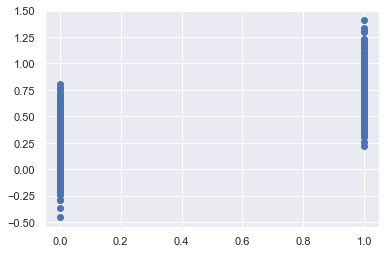

In [21]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)

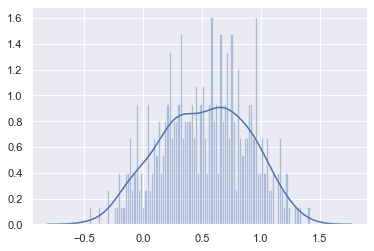

In [22]:
sns.distplot(predictions, bins=100)

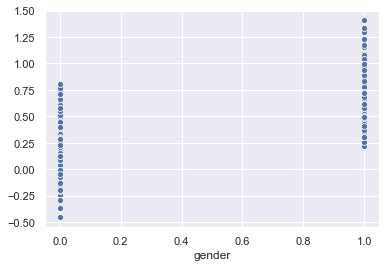

In [23]:
sns.scatterplot(y_test,predictions)

In [24]:
pred_df = pd.DataFrame(predictions)

In [25]:
pred_df.describe()

,0
count,400.000000
mean,0.519775
std,0.371242
min,-0.454717
25%,0.241162
50%,0.532141
75%,0.803339
max,1.412755


In [38]:
pred_df.shape

(400, 1)

In [26]:
copy_pred = (predictions > 0.53)*1

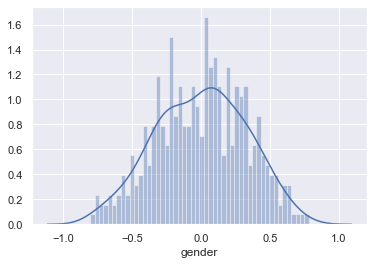

In [27]:
sns.distplot((y_test-predictions), bins = 50)

### 5.5 Model Evaluation Metrics

In [28]:
TP = sum((y_test == copy_pred) & (copy_pred == 1))

In [29]:
FP = sum((copy_pred == 1) & (y_test != copy_pred))

In [30]:
precision = TP/(TP+FP)
print(precision)

0.89
